In [92]:
%matplotlib inline     
# ^Sans animations
# %matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Dynamique de population et Génétique

*Sujet d'ARE Dynamic 2019*

# 1. Modèle de Galton-Watson 

[Francis Galton](https://fr.wikipedia.org/wiki/Francis_Galton) (1822-1911) est un scientifique anglais touche-à-tout, ayant des contributions de l'anthropologie à la psychologie en passant par les statistiques. Il consacre une part importante de ses recherches à défendre la théorie de l'évolution de son cousin, Charles Darwin. Il est considéré comme l'un des fondateurs de la biométrie, il découvre l'identification par empreintes digitales, cependant il est aussi l'un des fondateurs de l'[eugénisme](https://fr.wikipedia.org/wiki/Eug%C3%A9nisme) et soutient des politiques publiques peu glorieuses. 

Au cours du XIXème siècle il s'intéresse à la disparition des patronymes. Pour ce faire, il introduit le [modèle de Galton-Watson](https://fr.wikipedia.org/wiki/Processus_de_Galton-Watson) permettant de modéliser la dynamique d'une population. Introduit une première fois en 1845 par [Irénée-Jules Bienaymé](https://fr.wikipedia.org/wiki/Ir%C3%A9n%C3%A9e-Jules_Bienaym%C3%A9).

### Comment modéliser un tel phénomène ?

Considérons un ensemble d'**individus** formant une **population**. Par soucis de simplicité nous faisons abstraction des modalités de reproduction, couple, genre, etc...  
Chaque individu de la population est modélisé par une **variable** $X$ représentant sa capacité de reproduction, c'est-à-dire son nombre de descendants.  
Chaque individu de la population peut avoir $k$ descendants avec probabilité $p_k$ : $\mathbb{P}(X = k) = p_k$ avec $\sum_k p_k =1$.  

Commençons par modéliser un individu : la variable $X$.

In [93]:
# Dictionnaire représentant la distribution de probabilité des descendants.
# clef = nombre de descendants et valeur = probabilité
p = {0 : 0.5,
     1 : 0.2,
     2 : 0.2,
     3 : 0.1}

# Let's assert that this is a probalitiy distribution:
np.testing.assert_almost_equal(sum(p.values()),1)

In [94]:
def number_of_descendants(p):
    '''
    dict[int:float]->int
    Étant donnée une distibution de probabilité 'p', la fonction retourne le nombre de descendants d'un individu.
    '''
    u = np.random.random()
    s = 0
    for k in p.keys():
        s = s + p[k]
        if u < s:
            return k

**Question 1.1 :** Remplacer la distribution $p$ par une distribution qui vous semble cohérente, puis tester cette fonction. (Par exemple, vous pourrez tirer un certain nombre de fois un nombre de descendants selon cette fonction, puis vérifier que la distribution observée est conforme.)

In [95]:
def iterations(n):
    ''''''
    l = list()
    for i in range(0,n):
        l.append(number_of_descendants(p))
    return (l.count(0), l.count(1), l.count(2), l.count(3))
iterations(10000)

(5029, 2030, 1946, 995)

Modélisons maintenant cette population et son évolution au fil des générations.  
Soit $Z_n$ la population de la n-ème génération. $Z_{n+1} = \sum_{i=1}^{Z_n}X$.

In [96]:

def update_population(Z,p):
    '''
    int*dict[int:float]->int
    Étant donnés un nombre d'individus 'C' et une distibution de probabilité de descendants 'p',
    la fonction retourne le nombre d'individus à la prochaine génération.
    '''
    Z_new = 0
    for k in range(Z):
        #sum up all the descendants over all the population Z
        Z_new += number_of_descendants(p)
    return Z_new

update_population(8,p = {0 : 0.5,
     1 : 0.2,
     2 : 0.2,
     3 : 0.1})

8

**Question 1.2 :** Compléter la fonction "population_n_generations" ci-dessous qui, étant donné un nombre d'invidus de départ $Z_0$, une distribution de probabilité de descendants $p$ et un nombre de générations $n$, retourne une liste $L$ telle que $L[i]$ soit le nombre d'individus à la génération $i$ pour $i$ de $0$ à $n-1$.

In [97]:

def population_n_generations(Z0,p,n):
    """
     int*dict[int:float]*int->list[int]
     ...
    """
    
    Z= Z0
    L=[]
    for i in range(0,n-1):
        L.append(update_population(Z,p))
        Z = L[i] 
    return L

#test pour 10 générations, population initiale 20 individus
Z0 = 1000
n = 25
print(population_n_generations(Z0,p,n))

[935, 833, 763, 704, 624, 586, 532, 477, 451, 431, 411, 345, 312, 309, 266, 269, 255, 264, 245, 209, 199, 195, 170, 148]


À présent, visualisons l'évolution de cette population. Vous pouvez changer $n$, $Z_0$ et $p$.

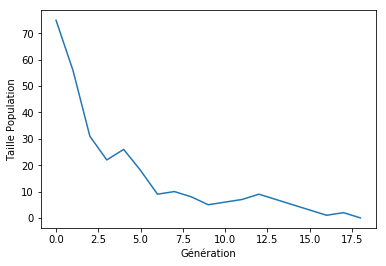

In [98]:
n = 300
Z0 = 40
p = {0 : 0.6,
     1 : 0.2,
     2 : 0.1,
     3 : 0.1}
np.testing.assert_almost_equal(sum(p.values()),1)

def plot_population(L):
    '''
    ??-> None
    Visualise the evolution of the population in 'L'
    '''
    plt.figure()
    plt.plot(L)
    plt.ylabel("Taille Population")
    plt.xlabel("Génération")
    plt.show()
    return

    
L=population_n_generations(100,p,20)
plot_population(L)

**Question 1.3** : Pour la capacité de reproduction $p$ donnée en exemple, observez-vous toujours une extinction de la population ?  Si c'est le cas, déterminez combien de générations sont nécessaires *en moyenne* avant que la population ne s'éteigne ?

In [99]:
def moy_pop(Z,p,k,n):
    """fonction retournant la moyenne des générations à partir de laquelle il y a une extinction"""
    first_gen_ext = []
    for i in range(n):
        pop = population_n_generations(i,p,k)
        r=0
        for j in pop:
            r = r + 1
            if j == 0:
                first_gen_ext.append(r)
                break
    return np.mean(first_gen_ext)
moy_pop(1000, p, 50, 50)

7.34

On appelle espérance d'une variable discrète $X$ : $\mathbb{E}[X] = \sum_k p_kk$

**Question 1.4**: Compléter la fonction "esperance" ci-dessous permettant de calculer l'espérance d'une variable discrète $X$.

In [100]:
p1 = {0 : 0.7,
     1 : 0.1,
     2 : 0.1,
     3 : 0.1}
def esperance(p1):
    """
    dict[int:float]->float
    ...
    """
    e=0
    for i in p1:
        e = i*p1[i] + e
    return e
esperance(p1)

0.6000000000000001

**Question 1.5**: Prenez à présent une capacité de reproduction dont l'espérance est 1.5 (testez que c'est bien le cas à l'aide de votre fonction précédente), et reproduisez l'expérience de la question 1.3. 

In [101]:
moy_pop(1000,p1,25, 1000)

11.032

**Question 1.6** : Jouer sur le paramètre $e = \mathbb{E}[X]$ et déterminer une valeure qui semble jouer un rôle critique dans le fait que la population va s'éteindre ou pas.

On constate que l'esperance joue un rôle critique dans le fait que la pop va s'éteindre ou non. On constate que plus l'esperance est faible, plus la population s'éteind lentement

**Question 1.7** : Que se passe-t-il lorsque $Z_0$ et $n$ sont grands ?

la gén d'extinction de la pop augmente lorsque 20 et n sont grands

# 2. Island Model

Dans cette seconde partie, le but est d'analyser la répartition et la dissémination des allèles au sein d'une population, répartie dans différentes zones géographiques, tout en prenant en compte les migrations.  

**Rappel :** Un allèle est une version variable d'un même gène. En général, il existe deux allèles pour chaque gène. Par exemple : si nous possèdons l'allèle brun nous avons les cheveux bruns, si nous ne l'avons pas nous avons les cheveux blonds. (extrême simplification, ne pas répéter à un biologiste).

Imaginons trois iles distinctes $A$, $B$ et $C$, sur chaque île réside une population distincte. Dans chaque population nous constatons une proportion différente de personne possédant un certain allèle. La distribution de cet allèle est notée par : $p_i$ pour $i\in \{A,B,C\}$.


![Island Model](Island_Model.png "Island_Model")

Par exemple : $p_A$ représente le pourcentage de la population de l'ile $A$ ayant les cheveux bruns.  

**Hypothèse 1:** La population globale $Z$ est considérée comme fixe et équirépartie entre les trois îles, chaque île comporte donc $Z/3$ individus. 
La population étant considérée comme stable, chaque individu laisse place à un seul individu à la génération suivante. Dans un premier temps nous ignorons donc le renouvelement de la population.  

Nous observons une migration d'une **fraction** $m$ d'une île à une autre au fil des générations, celle-ci est cependant équilibrée, à double sens, le nombre d'invidus par île ne varie donc pas. Par exmple, pour $m=0.1$, à chaque génération $10\%$ de la population va migrer de chaque île vers les autres. Cette fraction ne peut donc pas excéder $0.5$ (dans ce cas la totalité de la population migre de chaque île). 

Dans cette partie, nous chercherons à répondre à la question suivante : Comment les migrations impactent la distribution d'un allèle au sein des 3 îles ?


Modélisons l'évolution de la proportion de la population possédant notre allèle (les cheveux bruns) au sein de chaque île. Notons par $p_{A,n}$ la distribution de notre allèle dans l'ile $A$ à la génération $n$.  

On a $p_{A,n+1} = \frac{p_{A,n}\frac{Z}{3}(1 - 2m) + p_{B,n}\frac{Z}{3}m + p_{C,n}\frac{Z}{3}m}{\frac{Z}{3}}$  

et donc $p_{A,n+1} = p_{A,n}(1 - 2m) + p_{B,n}m + p_{C,n}m$.

**Question 2.1 :** Expliquer cette formule. Quant est-il pour $p_{B,n+1}$ et $p_{C,n+1}$ ?

Expliquons $p_{A,n+1} = p_{A,n}(1 - 2m) + p_{B,n}m + p_{C,n}m$


p_{A,n}(1 - 2m) correspond a la population intiale de A puis de ses pertes et 

p_{B,n}m + p_{C,n}m correspond aux gains de populations de l'île


$p_{B,n+1} = p_{B,n}(1 - 2m) + p_{A,n}m + p_{C,n}m$.

$p_{C,n+1} = p_{C,n}(1 - 2m) + p_{A,n}m + p_{B,n}m$.

In [102]:
# Nous utiliserons les paramètres suivants.

m = 0.01 # coefficient de migration

p = {'A' : 0.5,
    'B' : 0.2,
    'C' : 0.8} # Initial probability to have brown hair

**Question 2.2 :** Corriger la fonction *update_genetics* ci-dessous qui prend en entrée un dictionaire $p$ (représentant la proportion d'individus ayant les cheveux bruns dans chacune des trois îles à un instant donné), une fraction de migration $m$ et retourne la proportion d'individus ayant les cheveux bruns dans chacune des trois îles à l'instant suivant sous la forme d'un dictionaire.

In [103]:
def update_genetics(p,m):
    '''
    dict[str:float]*float->dict[str:float]
    Update the population's genetics 
    '''
    p_new={}
    p_new['A'] = p['A']*(1-2*m)+p['B']*m+p['C']*m
    p_new['B'] = p['B']*(1-2*m)+p['A']*m+p['C']*m
    p_new['C'] = p['C']*(1-2*m)+p['B']*m+p['A']*m
    return p_new

**Question 2.3 :** Compléter la signature et la description de la fonction *genetics_n_migrations* suivante.

In [104]:
def genetics_n_migrations(p,m,n):
    '''
    dict[str:float]*float*int->list[float]
    retourne la liste de la population des îles A,B,C
    '''
    keys=["A","B","C"] 
    M = []
    M.append([p[k] for k in keys])
    for i in range(1,n):
        p = update_genetics(p,m)
        M.append([p[k] for k in keys])
    return M
genetics_n_migrations(p,m,n)

[[0.5, 0.2, 0.8],
 [0.5, 0.20900000000000002, 0.791],
 [0.5, 0.21773, 0.78227],
 [0.5, 0.22619809999999999, 0.7738019],
 [0.5, 0.234412157, 0.765587843],
 [0.5, 0.24237979229000003, 0.75762020771],
 [0.5, 0.25010839852130007, 0.7498916014787],
 [0.5, 0.2576051465656611, 0.742394853434339],
 [0.5, 0.26487699216869126, 0.7351230078313088],
 [0.49999999999999994, 0.2719306824036305, 0.7280693175963695],
 [0.49999999999999994, 0.27877276193152156, 0.7212272380684784],
 [0.49999999999999994, 0.2854095790735759, 0.7145904209264241],
 [0.49999999999999994, 0.29184729170136864, 0.7081527082986314],
 [0.49999999999999994, 0.2980918729503276, 0.7019081270496724],
 [0.49999999999999994, 0.3041491167618177, 0.6958508832381822],
 [0.49999999999999994, 0.3100246432589632, 0.6899753567410368],
 [0.4999999999999999, 0.31572390396119426, 0.6842760960388058],
 [0.4999999999999999, 0.3212521868423584, 0.6787478131576417],
 [0.4999999999999999, 0.3266146212370877, 0.6733853787629124],
 [0.4999999999999999

A présent visualisons la fréquence de l'allèle au cours du temps.

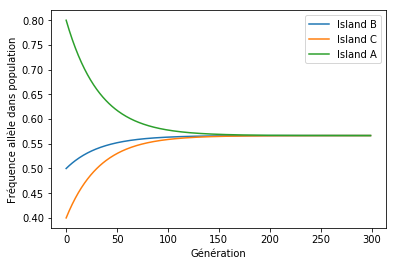

In [105]:
p = {'A' : 0.5,
    'B' : 0.4,
    'C' : 0.8}

m = 0.01 # Ratio of the population that migrate every generation

n = 300

M = genetics_n_migrations(p,m,n)

def plot_genetics(M,p):
    plt.figure()
    plt.plot(M)
    plt.legend(["Island "+i for i in p])
    plt.xlabel("Génération")
    plt.ylabel("Fréquence allèle dans population")
    plt.show()
    return
plot_genetics(M,p)

**Questions 2.4:** Modifier $p_A,p_B,p_C$ ainsi que le taux de migration $m$ et décrire les différents phénomènes observés.

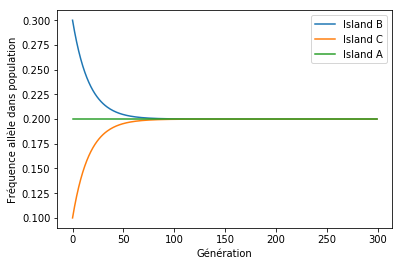

In [106]:
p = {'A' : 0.3,
    'B' : 0.1,
    'C' : 0.2}
m = 0.02
M = genetics_n_migrations(p,m,n)
plot_genetics(M,p)

On peut complexifier la modélisation en faisant varier le nombre d'îles ou bien les taux de migrations entre îles : $m$ $\rightarrow$ $m_{A,B}, m_{B,C}, m_{C,A}$.

### Variante  1 : Nombre d'îles variable :

**Question 2.5 (facultatif) :** Adapter les fonctions précédentes pour un nombre d'îles arbitraire. 

In [110]:
def update_genetics2(p,m):
    '''
    dict[str:float]*float->dict[str:float]
    Update the population's genetics 
    '''
    p_new={}
    p_new['A'] = p['A']*(1-3*m)+p['B']*m+p['C']*m+p['D']*m
    p_new['B'] = p['B']*(1-3*m)+p['A']*m+p['C']*m+p['D']*m
    p_new['C'] = p['C']*(1-3*m)+p['B']*m+p['A']*m+p['D']*m
    p_new['D'] = p['D']*(1-3*m)+p['B']*m+p['A']*m+p['C']*m
    return p_new

In [111]:
def genetics_n_migrations2(p,m,n):
    '''
    dict[str:float]*float*int->list[float]
    retourne la liste de la population des îles A,B,C
    '''
    keys=["A","B","C","D"] 
    M = []
    M.append([p[k] for k in keys])
    for i in range(1,n):
        p = update_genetics2(p,m)
        M.append([p[k] for k in keys])
    return M
genetics_n_migrations2(p,m,n)

[[0.5, 0.4, 0.8, 0.3],
 [0.5, 0.404, 0.788, 0.308],
 [0.5, 0.40784000000000004, 0.7764800000000001, 0.31567999999999996],
 [0.5, 0.41152640000000007, 0.7654208, 0.3230528],
 [0.5, 0.41506534400000006, 0.7548039679999999, 0.33013068799999995],
 [0.5, 0.4184627302400001, 0.7446118092799999, 0.33692546047999994],
 [0.49999999999999994,
  0.4217242210304,
  0.7348273369087999,
  0.34344844206079994],
 [0.49999999999999994,
  0.424855252189184,
  0.7254342434324478,
  0.3497105043783679],
 [0.49999999999999994,
  0.4278610421016167,
  0.7164168736951498,
  0.3557220842032332],
 [0.49999999999999994,
  0.43074660041755203,
  0.7077601987473439,
  0.36149320083510383],
 [0.49999999999999994,
  0.4335167364008499,
  0.6994497907974501,
  0.3670334728016997],
 [0.49999999999999994,
  0.4361760669448159,
  0.6914717991655521,
  0.37235213388963173],
 [0.4999999999999999,
  0.43872902426702326,
  0.68381292719893,
  0.3774580485340464],
 [0.49999999999999983,
  0.4411798632963423,
  0.67646041011

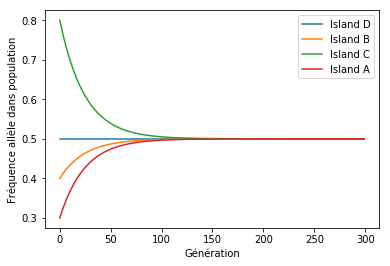

In [112]:
p = {'A' : 0.5,
    'B' : 0.4,
    'C' : 0.8,
    'D' : 0.3}

m = 0.01 # Ratio of the population that migrate every generation

n = 300

M = genetics_n_migrations2(p,m,n)

def plot_genetics2(M,p):
    plt.figure()
    plt.plot(M)
    plt.legend(["Island "+i for i in p])
    plt.xlabel("Génération")
    plt.ylabel("Fréquence allèle dans population")
    plt.show()
    return
plot_genetics2(M,p)

### Variante 2 : Taux de migrations différents entre îles  :

Considérons tout d'abord : $m_{A,B} = m_{B,A}$, $m_{A,C} = m_{C,A}$ et $m_{C,B} = m_{B,C}$.

**Question 2.6 :** Retrouver la formule suivante et adapter les fonctions précédentes. $p_{A,n+1} = p_{A,n}(1-m_{A,B}-m_{C,A})+p_{B,n}m_{B,A}+p_{C,n}m_{C,A}$

Nous avons cette formule :  $p_{A,n+1} = p_{A,n}(1 - 2m) + p_{B,n}m + p_{C,n}m$.
En appliquant les égalités juste au dessus, on remplace les taux de migrations correspondant à chacune des valeurs on a alors :

$p_{A,n+1} = p_{A,n}(1-m_{A,B}-m_{A,C})+p_{B,n}m_{B,A}+p_{C,n}m_{C,A}$
<=>
$p_{A,n+1} = p_{A,n}(1-m_{A,B}-m_{C,A})+p_{B,n}m_{B,A}+p_{C,n}m_{C,A}$

In [113]:
#Nous utiliserons les paramètres suivants.

p = {'A' : 0.1,
    'B' : 0.4,
    'C' : 0.8} # Initial probability to have red hair 

m = {('A','B') : 0.2, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.2,
     ('A','C') : 0.01,
     ('C','A') : 0.05,
     ('B','C') : 0.01,
     ('C','B') : 0.01}

In [114]:
def update_genetics_bis(p,m):
    '''
    dict[str:float]*float->dict[str:float]
    Update the population's genetics 
    '''
    p_new={}
    p_new['A'] = p['A']*(1-m[('A','B')]- m[('A','C')])+p['B']*m[('A','B')]+p['C']*m[('A','C')]
    p_new['B'] = p['B']*(1-m[('A','B')]- m[('B','C')])+p['A']*m[('A','B')]+p['C']*m[('B','C')]
    p_new['C'] = p['C']*(1-m[('C','B')]- m[('A','C')])+p['B']*m[('C','B')]+p['A']*m[('A','C')]
    return p_new

def genetics_variante2(p,m,n):
    '''
    dict[str:float]*float*int->list[float]
    retourne la liste de la population des îles A,B,C
    '''
    keys=["A","B","C"] 
    M = []
    M.append([p[k] for k in keys])
    for i in range(1,n):
        p = update_genetics_bis(p,m)
        M.append([p[k] for k in keys])
    return M
genetics_variante2(p,m,50)

[[0.1, 0.4, 0.8],
 [0.16700000000000004, 0.3440000000000001, 0.789],
 [0.20862000000000008, 0.31305000000000005, 0.77833],
 [0.23520310000000005, 0.29681680000000005, 0.7679801],
 [0.25285361000000006, 0.28920569300000004, 0.7579406970000001],
 [0.26517489747000006, 0.28662262644000003, 0.7482024760900001],
 [0.27429471905020003, 0.2869488791425, 0.7387564018073002],
 [0.281470167896231, 0.28893612235068805, 0.7295937097530812],
 [0.2874445942056909, 0.2918495073338206, 0.7207058984604889],
 [0.2926581898738648, 0.29525708861946137, 0.7120847215066742],
 [0.29737223493931225, 0.2989055851992142, 0.703722179861474],
 [0.30174240444051426, 0.3026470810938564, 0.6956105144656297],
 [0.3058620208714338, 0.3063957800969057, 0.6877421990316609],
 [0.3097875744981305, 0.3101024924411589, 0.6801099330607111],
 [0.31355378167236203, 0.3137395832587488, 0.6727066350688897],
 [0.31718247052360465, 0.3172920934595728, 0.665525436016823],
 [0.32068782476573043, 0.3207525022979517, 0.658559672936318

**Question 2.7**: Que se passe-t-il si le taux de migrations d'un île à une autre n'est plus symétrique : $m_{A,B} \neq m_{B,A}$ ? Est-ce que notre notre calcul est toujours correct ? (Indice : cf hypothèse 1.)

On constate que lorsque le taux de migration n'est plus symétrique, la population ne s'équilibre pas au cours des générations. L'hypothèse 1 n'est plus valide car les populations ne sont plus équirépartie entre les 3 îles. 
calcul juste mais différent ?

# 3. Galton-Watson et Migrations

Dans cette partie nous nous intéressons aux nombres d'individus sur chaque île sans tenir compte de leurs patrimoines génétiques. Nous supposons que la population de chaque île suit un modele de Gatson-Watson. Prenons en compte les migrations et adaptons notre modèle en conséquent.

Notons $Z_{A,n},Z_{B,n},Z_{C,n}$ les populations des îles $A$, $B$ et $C$ à la génération $n$. 

La formule suivante peut sembler compliquée, mais s'interprète assez facilement :
- $Z_{A,n+1} = \sum_{i=1}^{Z_{A,n}'}X$ où $Z_{A,n}' = Z_{A,n}(1-m_{A,B}-m_{A,C})+Z_{B,n}m_{B,A}+Z_{C,n}m_{C,A}$.

$Z_{A,n}'$ est la population de l'île $A$ à la generation $n$ **après** avoir pris en compte les migrations.

**Question 3.1 :** Retrouver les formules pour $Z_{B,n+1}$ ainsi que pour $Z_{C,n+1}$.

- $Z_{B,n+1} = \sum_{i=1}^{Z_{B,n}'}X$ où $Z_{B,n}' = Z_{B,n}(1-m_{B,A}-m_{B,C})+Z_{A,n}m_{A,B}+Z_{C,n}m_{C,B}$.
- $Z_{C,n+1} = \sum_{i=1}^{Z_{C,n}'}X$ où $Z_{C,n}' = Z_{C,n}(1-m_{C,A}-m_{B,A})+Z_{A,n}m_{A,C}+Z_{B,n}m_{B,C}$.

Modélisons l'évolution de cet archipel au fil des générations.

In [115]:
#Nous utiliserons les paramètres suivants.

p = {0 : 0.4,
     1 : 0.3,
     2 : 0.2,
     3 : 0.1} # Number of descendants
np.testing.assert_almost_equal(sum(p.values()),1)

P = {'A' : p,
     'B' : p,
     'C' : p} # Galton Watson parameter on each island

Z0 = {'A' : 40,
     'B' : 1000,
     'C' : 400} #Initial Population

M = {('A','B') : 0.02, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.02,
     ('A','C') : 0.05,
     ('C','A') : 0.05,
     ('B','C') : 0.01,
     ('C','B') : 0.01}

n = 10 #Number of generations


**Question 3.2 :** Compléter la fonction ci-dessous.

In [116]:
def update_populations_with_migrations(Z,P,M):
    '''
    ???->???
    ???
    '''
    Z_new = {}
    Z_new['A'] = update_population(int(Z['A']*(1-M[('A','B')]- M[('A','C')])+Z['B']*M[('B','A')]+Z['C']*M[('C','A')]),P['A'])
    Z_new['B'] = update_population(int(Z['B']*(1-M[('B','A')]- M[('B','C')])+Z['A']*M[('A','B')]+Z['C']*M[('B','C')]),P['B'])
    Z_new['C'] = update_population(int(Z['C']*(1-M[('C','B')]- M[('C','A')])+Z['B']*M[('B','C')]+Z['A']*M[('A','C')]),P['C'])
    return Z_new

update_populations_with_migrations(Z0,P,M)


{'A': 66, 'B': 976, 'C': 384}

In [117]:
"Question 3.3 :** Visualiser le nombre d'individu sur chaque île."

"Question 3.3 :** Visualiser le nombre d'individu sur chaque île."

In [118]:
def nbr_individus(Z0,P,M,n):
    '''
    dict[str:float]*float*int->list[float]
    retourne la liste de la population des îles A,B,C
    '''
    Z_new = Z0
    for i in range(1,n):
        Z_new = update_populations_with_migrations(Z_new,P,M)
    return Z_new
    
nbr_individus(Z0,P,M,n)

{'A': 301, 'B': 768, 'C': 362}

**Questions 3.4 :**
- Faire varier les populations initiales $Z_0$.
- Modifier les paramètres de migrations pour éteindre la population d'une seule île.
- Faire survivre la population d'une seule île.

In [119]:
p = {0 : 0.4,
     1 : 0.3,
     2 : 0.2,
     3 : 0.1} # Number of descendants
np.testing.assert_almost_equal(sum(p.values()),1)

P = {'A' : p,
     'B' : p,
     'C' : p} # Galton Watson parameter on each island

Z0 = {'A' : 40,
     'B' : 1000,
     'C' : 400} #Initial Population

M0 = {('A','B') : 0.02, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.02,
     ('A','C') : 0.00,
     ('C','A') : 0.50,
     ('B','C') : 0.00,
     ('C','B') : 0.60}

n = 50 #Number of generations


nbr_individus(Z0,P,M0,n)

{'A': 445, 'B': 749, 'C': 0}

In [120]:
p = {0 : 0.4,
     1 : 0.3,
     2 : 0.2,
     3 : 0.1} # Number of descendants
np.testing.assert_almost_equal(sum(p.values()),1)

P = {'A' : p,
     'B' : p,
     'C' : p} # Galton Watson parameter on each island

Z0 = {'A' : 40,
     'B' : 1000,
     'C' : 400} #Initial Population

M0 = {('A','B') : 0.30, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.00,
     ('A','C') : 0.10,
     ('C','A') : 0.50,
     ('B','C') : 0.00,
     ('C','B') : 0.60}

n = 50#Number of generations
nbr_individus(Z0,P,M0,n)

{'A': 0, 'B': 1539, 'C': 0}

### Visualisation Dynamique (Facultatif)

Avec cette visualisation il est très simple d'observer les phénomènes de cas (sur/sous)-critiques, en faisant varier ne serait-ce que très légérement l'espérance.

In [228]:
import pandas as pd
def animated_populations(Z,P,M,n):
    n_island = len(Z)
    pop_dict = {0:Z}
    for i in range(n):
        Z = update_populations_with_migrations(Z,P,M)
        pop_dict[i]=Z.copy()
    pop_df = pd.DataFrame.from_dict(pop_dict,orient='index')
    fig = plt.figure()
    cmap = plt.get_cmap('tab10')
    barplot = plt.bar(range(n_island),pop_df.max(),color=[cmap(i) for i in range(n_island)])
    def animate(i):
        populations = pop_df.iloc[i,:]
        for j,b in enumerate(barplot):
            b.set_height(populations[j])
    plt.tick_params(top=False,right=False)
    plt.xticks(range(n_island),["Island "+str(i) for i in Z.keys()])
    plt.ylabel("Population")
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    anim = animation.FuncAnimation(fig,animate,blit=False,
                                  frames = n,interval=300,repeat=False)
    anim.save('mymovie.mp4',writer=animation.FFMpegWriter(fps=10))
    return anim

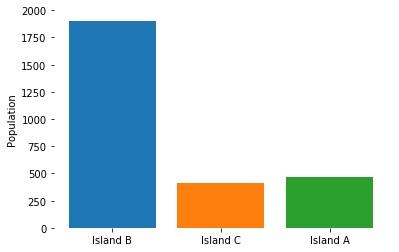

In [229]:
p = {0 : 0.4,
     1 : 0.3,
     2 : 0.2,
     3 : 0.1}
np.testing.assert_almost_equal(sum(p.values()),1)
P = {'A' : p,
     'B' : p,
     'C' : p}
Z0 = {'A' : 400,
     'B' : 2000,
     'C' : 400}
M = {('A','B') : 0.05, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.05,
     ('A','C') : 0.05,
     ('C','A') : 0.05,
     ('B','C') : 0.01,
     ('C','B') : 0.01}
n = 400
animated_populations(Z0,P,M,n)

# 4. Galton-Island

Retournons à notre Island Model, maintenant que nous avons pris en compte l'évolution de la population sur chaque île, celle-ci n'étant plus constante, nous allons pouvoir réaliser un modèle un peu plus réaliste, nous oublions l'**hypothèse 1**.

**Question 4.1 :** Retrouver la formule générale suivante :

$p_{A,n+1} = \frac{\displaystyle p_{A,n}Z_{A,n}(1-m_{A,B}-m_{A,C})+p_{B,n}Z_{B,n}m_{B,A}+p_{C,n}Z_{C,n}m_{C,n}}{\displaystyle Z_{A,n}(1-m_{A,B}-m_{A,C})+Z_{B,n}m_{B,A}+Z_{C,n}m_{C,n}}$


Adapter les fonctions précédentes dans les box ci dessous.

Expliquons:

$p_{A,n+1} = \frac{\displaystyle p_{A,n}Z_{A,n}(1-m_{A,B}-m_{A,C})+p_{B,n}Z_{B,n}m_{B,A}+p_{C,n}Z_{C,n}m_{C,n}}{\displaystyle Z_{A,n}(1-m_{A,B}-m_{A,C})+Z_{B,n}m_{B,A}+Z_{C,n}m_{C,n}}$

Nous cherchons la proportion de personne avec un certain trait de caractère sur l'île A par exemple. Au numérateur nous avons toutes les personnes de l'île A ayant ce trait de caractère, plus les personnes venant de l'île B l'ayant égalemment, et de même pour les venants de l'île C. Au dénominateur nous avons le nombre totale de personne sur l'île étudiée (dans la formule l'île A). C'est ainsi que nous obtenons la proportion de personne qui possède un certain trait de caractère.


In [123]:
Z = {'A' : 500,
     'B' : 10000,
     'C' : 50} # Initial population
p = {0 : 0.3,
     1 : 0.5,
     2 : 0.1,
     3 : 0.1}
p_galton = {'A' : p,
            'B' : p,
            'C' : p}
p_genetics = {'A' : 0.05,
              'B' : 0.1,
              'C' : 0.05} # Initial proportion of the population that can survive the disease. 
m = {('A','B') : 0.02, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.02,
     ('A','C') : 0.05,
     ('C','A') : 0.05,
     ('B','C') : 0.04,
     ('C','B') : 0.04}
n = 200
n_epi = 50

In [124]:
def galton_island(Z,p_galton,p_genetics,m,n):
    '''
    Combinaison des deux modèles 
    '''
    Z_new = Z
    p_new = p_genetics
    for i in range(1,n):
        Z_new = update_populations_with_migrations(Z_new,p_galton,m)
        p_new = update_genetics_with_migrations(Z_new,p_genetics,m,verbose=False)
    d= {}
    d['A']= int(Z_new['A']*p_new['A'])
    d['B']= int(Z_new['B']*p_new['B'])
    d['C']= int(Z_new['C']*p_new['C'])
    return d
galton_island(Z,p_galton,p_genetics,m,n)

{'A': 183, 'B': 342, 'C': 189}

In [125]:
p_genetics = {'A' : 0.05,
              'B' : 0.1,
              'C' : 0.05}

def update_genetics_with_migrations(Z,p,m,verbose=False):
    '''
    Update the genetics of the population 'C', with parameter in 'p_galton' and 'p_genetics',
    according to migrations 'm' 
    '''
    p_new={}
    p_new['A'] = (p['A']*Z['A']*(1-m[('A','B')]- m[('A','C')])+p['B']*Z['B']*m[('A','B')]+p['C']*Z['C']*m[('A','C')])/(Z['A']*(1-m[('A','B')]- m[('A','C')])+Z['B']*m[('A','B')]+Z['C']*m[('A','C')])
    p_new['B'] = (p['B']*Z['B']*(1-m[('A','B')]- m[('B','C')])+p['A']*Z['A']*m[('A','B')]+p['C']*Z['C']*m[('B','C')])/(Z['B']*(1-m[('A','B')]- m[('B','C')])+Z['A']*m[('A','B')]+Z['C']*m[('B','C')])
    p_new['C'] = (p['C']*Z['C']*(1-m[('C','B')]- m[('A','C')])+p['B']*Z['B']*m[('C','B')]+p['A']*Z['A']*m[('A','C')])/(Z['C']*(1-m[('C','B')]- m[('A','C')])+Z['B']*m[('C','B')]+Z['A']*m[('A','C')])
    return p_new
   
update_genetics_with_migrations(Z,p_genetics,m,verbose=False)

{'A': 0.0649812734082397, 'B': 0.09993625159371015, 'C': 0.09250797024442083}

**Questions 4.2 :** Observer l'évolution de la proportion de la population possédant l'allèle au sein de chaque île.

In [141]:
def genetics_n_migrationsbis(p,m,n):
    '''
    dict[str:float]*float*int->list[float]
    retourne la liste de la population des îles A,B,C
    '''
    keys=["A","B","C"] 
    M = []
    pr = dict()
    Z_new = Z
    p_new = p_genetics
    M.append([p_new[k] for k in keys])
    for i in range(1,n):
        Z_new = update_populations_with_migrations(Z_new,p_galton,m)
        p_new = update_genetics_with_migrations(Z_new,p_new,m,verbose=False)
        M.append([p_new[k] for k in keys])
    return M
genetics_n_migrationsbis(p_genetics,m,n)



[[0.05, 0.1, 0.05],
 [0.06138417058185762, 0.09982376868040768, 0.07295137708262496],
 [0.06877284911959855, 0.09963907745334402, 0.08069663704100638],
 [0.07393361931838673, 0.099454224233241, 0.08475099310704962],
 [0.07769475273081015, 0.09926265242647098, 0.08711754083934292],
 [0.08053582572688742, 0.099070483900641, 0.0887146129718529],
 [0.08271646820924647, 0.09888265309122142, 0.08989646862437385],
 [0.08444213948816282, 0.09868937006443007, 0.09073346034353143],
 [0.08585001435693712, 0.09849559047103748, 0.09136856876958004],
 [0.08702553936134116, 0.0983050256864059, 0.09187394138649757],
 [0.08798060652008374, 0.09811409139604156, 0.09227264892877925],
 [0.08878251692114589, 0.09792827806344467, 0.0926034776967435],
 [0.08945736794985294, 0.09774545709543613, 0.09287480604627583],
 [0.09002748795491908, 0.09756484700231474, 0.09309668424791949],
 [0.09052923595599942, 0.09739005239032494, 0.09328492143089777],
 [0.09095235604630114, 0.09722253706094085, 0.09344707131519409

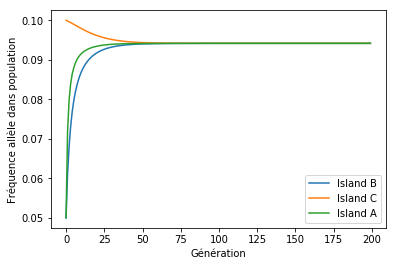

In [142]:
M = genetics_n_migrationsbis(p_genetics,m,n)

def plot_genetics2(M,p):
    plt.figure()
    plt.plot(M)
    plt.legend(["Island "+i for i in p])
    plt.xlabel("Génération")
    plt.ylabel("Fréquence allèle dans population")
    plt.show()
    return
plot_genetics2(M,p_genetics)

In [143]:
def population_n_migrationsbis(Z,p,m,n):
    '''
    dict[str:float]*float*int->list[float]
    retourne la liste de la population des îles A,B,C
    '''
    keys=["A","B","C"] 
    M = []
    Z_new = Z
    p_new = p_genetics
    M.append([p_new[k]*Z_new[k] for k in keys])
    for i in range(1,n):
        Z_new = update_populations_with_migrations(Z_new,p_galton,m)
        p_new = update_genetics_with_migrations(Z_new,p_new,m,verbose=False)
        M.append([p_new[k]*Z_new[k] for k in keys])
    return M
population_n_migrationsbis(Z,p,m,200)

[[25.0, 1000.0, 2.5],
 [40.73979394875259, 931.8882152191043, 34.32191217488736],
 [55.352792433625694, 877.3671234743223, 66.29784021880687],
 [72.41475155588053, 829.3363915678837, 99.98151702838828],
 [89.18878980910726, 794.879951627464, 126.4593455496983],
 [104.62948182525264, 767.3842552638862, 153.39519284702405],
 [118.46490929952277, 730.7881410346763, 177.48985379859835],
 [133.85307858302522, 698.0495219390618, 204.33349655292238],
 [145.8392440405096, 666.0587142724777, 216.5190381161061],
 [160.96542213182175, 644.3449218225, 227.35188478754014],
 [178.57361480902665, 621.026897440464, 249.22405022850782],
 [189.1623242932044, 590.3748882984087, 257.5551043990674],
 [204.99414649371528, 572.2594377748472, 271.04931378573593],
 [215.56876129299954, 541.04107870788, 282.87075387082496],
 [229.11921045881041, 521.6486084407059, 285.78088971536545],
 [247.76998534970224, 496.1038829267393, 292.5035299727632],
 [252.39953516957777, 489.51325302511907, 301.8046782179359],
 [264

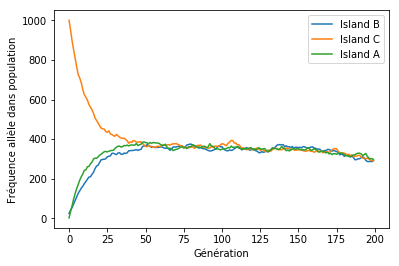

In [144]:
M = population_n_migrationsbis(Z,p_genetics,m,n)

def plot_genetics3(M,p):
    plt.figure()
    plt.plot(M)
    plt.legend(["Island "+i for i in p])
    plt.xlabel("Génération")
    plt.ylabel("Fréquence allèle dans population")
    plt.show()
    return
plot_genetics3(M,p_genetics)

In [145]:
def population(Z,p,m,n):
    '''
    dict[str:float]*float*int->list[float]
    retourne la liste de la population des îles A,B,C
    '''
    keys=["A","B","C"] 
    M = []
    Z_new = Z
    M.append([Z_new[k] for k in keys])
    for i in range(1,n):
        Z_new = update_populations_with_migrations(Z_new,p_galton,m)
        M.append([Z_new[k] for k in keys])
    return M
population(Z,p_galton,m,n)



[[500, 10000, 50],
 [674, 9311, 447],
 [829, 8789, 811],
 [1002, 8196, 1107],
 [1186, 7756, 1361],
 [1312, 7449, 1585],
 [1462, 7067, 1803],
 [1618, 6696, 1980],
 [1749, 6370, 2153],
 [1858, 6078, 2300],
 [2002, 5907, 2435],
 [2046, 5610, 2580],
 [2108, 5407, 2657],
 [2222, 5242, 2701],
 [2252, 5100, 2871],
 [2340, 4929, 2951],
 [2414, 4827, 3083],
 [2470, 4687, 3123],
 [2578, 4580, 3173],
 [2706, 4500, 3187],
 [2733, 4437, 3198],
 [2813, 4427, 3252],
 [2831, 4252, 3241],
 [2929, 4171, 3330],
 [2954, 4118, 3332],
 [2960, 4001, 3281],
 [2981, 3910, 3296],
 [2973, 3813, 3341],
 [2963, 3814, 3262],
 [3019, 3736, 3162],
 [3036, 3664, 3154],
 [3054, 3564, 3225],
 [3081, 3552, 3268],
 [3094, 3537, 3287],
 [3069, 3507, 3245],
 [2985, 3492, 3216],
 [2989, 3462, 3166],
 [2939, 3423, 3187],
 [2947, 3338, 3205],
 [2991, 3263, 3182],
 [3007, 3263, 3192],
 [3043, 3325, 3171],
 [3025, 3309, 3197],
 [3083, 3326, 3343],
 [3116, 3313, 3235],
 [3080, 3241, 3299],
 [3128, 3320, 3394],
 [3083, 3371, 3253]

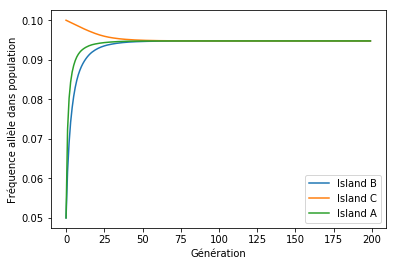

In [131]:
M = genetics_n_migrationsbis(p_genetics,m,n)

def plot_genetics(M,p):
    plt.figure()
    plt.plot(M)
    plt.legend(["Island "+i for i in p])
    plt.xlabel("Génération")
    plt.ylabel("Fréquence allèle dans population")
    plt.show()
    return
plot_genetics(M,p_genetics)

In [133]:
def genetics_n_migrations2(p,m,n):
    '''
    Combinaison des deux modèles 
    '''
    Z_new = Z
    p_new = p_genetics
    for i in range(1,n):
        Z_new = update_populations_with_migrations(Z_new,p_galton,m)
        p_new = update_genetics_with_migrations(Z_new,p_genetics,m,verbose=False)
    d= {}
    d['A']= int(Z_new['A']*p_new['A'])
    d['B']= int(Z_new['B']*p_new['B'])
    d['C']= int(Z_new['C']*p_new['C'])
    return d
genetics_n_migrations2(p,m,n)

{'A': 154, 'B': 266, 'C': 153}

# 5. L'épidémie

Une épidémie se propage sur l'archipel, seul les individus possèdant la version du gène étudié (les cheveux bruns) peuvent y survivre. (Un truc très sérieux, genre peste bubonique ou ebola 2.0). Cette épidémie survient lors de la génération arbitraire : *n_epi*.


**Question 5.1 :** Rajoutez dans la fonction *galton_island* précédente une condition permettant de modéliser ce phénomène. 
Indice : Rajouter un test correpondant à *n_epi* et ajuster la population en fonction de $p_{A,n}$, $p_{B,n}$ et $p_{C,n}$. 

In [199]:
def update_genetics_with_migrations2(Z,p,m,verbose=False):
    '''
    Update the genetics of the population 'C', with parameter in 'p_galton' and 'p_genetics',
    according to migrations 'm' 
    '''
    p_new={}
    p_new['A'] = (p['A']*Z['A']*(1-m[('A','B')]- m[('A','C')])+p['B']*Z['B']*m[('A','B')]+p['C']*Z['C']*m[('A','C')])/(Z['A']*(1-m[('A','B')]- m[('A','C')])+Z['B']*m[('A','B')]+Z['C']*m[('A','C')])
    p_new['B'] = (p['B']*Z['B']*(1-m[('A','B')]- m[('B','C')])+p['A']*Z['A']*m[('A','B')]+p['C']*Z['C']*m[('B','C')])/(Z['B']*(1-m[('A','B')]- m[('B','C')])+Z['A']*m[('A','B')]+Z['C']*m[('B','C')])
    p_new['C'] = (p['C']*Z['C']*(1-m[('C','B')]- m[('A','C')])+p['B']*Z['B']*m[('C','B')]+p['A']*Z['A']*m[('A','C')])/(Z['C']*(1-m[('C','B')]- m[('A','C')])+Z['B']*m[('C','B')]+Z['A']*m[('A','C')])
    return p_new

def galton_island_with_disease(Z,p_galton,p_genetics,m,n,n_epi):
    '''
    Combinaison des deux modèles + maladie à la génération 'n_epi'
    '''
    keys=["A","B","C"] 
    p = p_genetics
    M = []
    p_new = p_genetics
    Z_new = Z
    M.append([Z_new[k] for k in keys])
    for i in range(0,n_epi):
        Z_new = update_populations_with_migrations(Z_new,p_galton,m)
        p_new = update_genetics_with_migrations(Z_new,p_new,m,verbose=False)
        M.append([Z_new[k] for k in keys])
    M.append([int(Z_new[k]*p_new[k]) for k in keys])
    Z_new['A'] = int(Z_new['A']*p_new['A'])
    Z_new['B'] = int(Z_new['B']*p_new['B'])
    Z_new['C'] = int(Z_new['C']*p_new['C'])
    for i in range(n_epi,n):
        Z_new = update_populations_with_migrations(Z_new,p_galton,m)
        p_new = update_genetics_with_migrations(Z_new,p_new,m,verbose=False)
        M.append([Z_new[k] for k in keys])
    return M
galton_island_with_disease(Z,p_galton,p_genetics,m,n,n_epi)

[[500, 10000, 50],
 [256, 9818, 594],
 [144, 9482, 1026],
 [78, 9142, 1378],
 [55, 8934, 1680],
 [48, 8682, 2011],
 [48, 8457, 2234],
 [47, 8389, 2402],
 [48, 8144, 2655],
 [51, 7989, 2866],
 [52, 7700, 3079],
 [75, 7508, 3235],
 [67, 7287, 3390],
 [77, 7076, 3511],
 [88, 7073, 3576],
 [99, 6885, 3587],
 [84, 6854, 3677],
 [82, 6813, 3752],
 [82, 6812, 3918],
 [82, 6767, 4003],
 [79, 6758, 4137],
 [83, 6731, 4233],
 [80, 6662, 4369],
 [64, 6648, 4326],
 [65, 6596, 4273],
 [78, 6416, 4363],
 [86, 6401, 4385],
 [85, 6290, 4458],
 [108, 6258, 4427],
 [110, 6228, 4492],
 [93, 6172, 4448],
 [101, 6056, 4538],
 [98, 6081, 4556],
 [104, 6035, 4660],
 [99, 6055, 4767],
 [91, 5839, 4880],
 [99, 5791, 4954],
 [97, 5733, 4989],
 [109, 5705, 5019],
 [108, 5715, 5109],
 [110, 5850, 5044],
 [102, 5852, 4955],
 [95, 5835, 4959],
 [100, 5828, 4961],
 [101, 5861, 4987],
 [108, 5822, 5053],
 [109, 6012, 4905],
 [103, 5761, 4843],
 [115, 5738, 4825],
 [117, 5742, 4767],
 [110, 5799, 4814],
 [71, 3762, 31

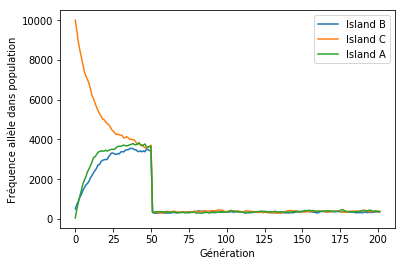

In [147]:
M = galton_island_with_disease(Z,p_galton,p_genetics,m,n,n_epi)

def plot_genetics2(M,p):
    plt.figure()
    plt.plot(M)
    plt.legend(["Island "+i for i in p])
    plt.xlabel("Génération")
    plt.ylabel("Fréquence allèle dans population")
    plt.show()
    return
plot_genetics2(M,p_genetics)

In [168]:
def p_island_with_disease(Z,p_galton,p_genetics,m,n,n_epi):
    '''
    Combinaison des deux modèles + maladie à la génération 'n_epi'
    '''
    keys=["A","B","C"] 
    p = p_genetics
    M = []
    p_new = p_genetics
    Z_new = Z
    M.append([p_new[k] for k in keys])
    for i in range(0,n_epi):
        Z_new = update_populations_with_migrations(Z_new,p_galton,m)
        p_new = update_genetics_with_migrations(Z_new,p_new,m,verbose=False)
        M.append([p_new[k] for k in keys])
    a_new = p_new['A']
    b_new = p_new['B']
    c_new = p_new['C']
    p_new['A'] = (a_new)/(a_new+b_new+c_new)
    p_new['B'] = (b_new)/(a_new+b_new+c_new)
    p_new['C'] = (c_new)/(a_new+b_new+c_new)
    M.append([p_new[k] for k in keys])
    for i in range(n_epi,n):
        Z_new = update_populations_with_migrations(Z_new,p_galton,m)
        p_new = update_genetics_with_migrations(Z_new,p_new,m,verbose=False)
        M.append([p_new[k] for k in keys])
    return M
p_island_with_disease(Z,p_galton,p_genetics,m,n,n_epi)

[[0.25, 0.15, 0.35],
 [0.22964936280509754, 0.1505463950500182, 0.25334353462817477],
 [0.21604945799428732, 0.15109124155501708, 0.2201037778691868],
 [0.20632268130828038, 0.15162182772416358, 0.2030539975795208],
 [0.19915410838099176, 0.15215437371282764, 0.19308043135270933],
 [0.1938059840870207, 0.15269402448527325, 0.18662688251599474],
 [0.18953729627451962, 0.15322163118097346, 0.18202546378145662],
 [0.18613681481724792, 0.15375865940864938, 0.17875846881567556],
 [0.18337447774314594, 0.15429905750524947, 0.17631993693532608],
 [0.18104777554793916, 0.15482978025850203, 0.17440939881595202],
 [0.17910646623068757, 0.15534767547589318, 0.1728689216391395],
 [0.17746241438748386, 0.15585081795244674, 0.17160963098342094],
 [0.17607523705890887, 0.1563475837548668, 0.17059275804678634],
 [0.17491676274105258, 0.15683075718272396, 0.16974664775989529],
 [0.17392624893801345, 0.15729223593704125, 0.16902631971287732],
 [0.17303179907921723, 0.15774916069664127, 0.168450029167353

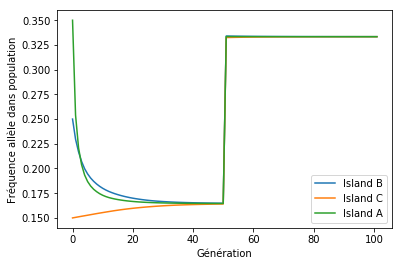

In [169]:
M = p_island_with_disease(Z,p_galton,p_genetics,m,n,n_epi)

def plot_genetics2(M,p):
    plt.figure()
    plt.plot(M)
    plt.legend(["Island "+i for i in p])
    plt.xlabel("Génération")
    plt.ylabel("Fréquence allèle dans population")
    plt.show()
    return
plot_genetics2(M,p_genetics)

In [150]:
Z = {'A' : 500,
     'B' : 10000,
     'C' : 500} # Initial population
p = {0 : 0.3,
     1 : 0.5,
     2 : 0.1,
     3 : 0.1}
p_galton = {'A' : p,
            'B' : p,
            'C' : p}
p_genetics = {'A' : 0.05,
              'B' : 0.1,
              'C' : 0.05} # Initial proportion of the population that can survive the disease. 
m = {('A','B') : 0.02, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.02,
     ('A','C') : 0.05,
     ('C','A') : 0.02,
     ('B','C') : 0.04,
     ('C','B') : 0.02}
n_epi = 50
n = 300

**Questions 5.2 :**
  - Faire varier les paramètres des 2 modèles afin de faire survivre les populations des trois iles.
  - Faire varier les paramètres afin de faire survivre seulement les habitants des îles $A$ et $B$.
  - Faire varier les paramètres afin de faire survivre seulement les habitant de l'île $C$.

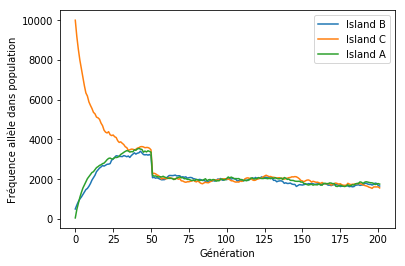

In [185]:

Z = {'A' : 500,
     'B' : 10000,
     'C' : 50} # Initial population
p = {0 : 0.3,
     1 : 0.5,
     2 : 0.1,
     3 : 0.1}
p_galton = {'A' : p,
            'B' : p,
            'C' : p}
p_genetics = {'A' : 0.55,
              'B' : 0.65,
              'C' : 0.85} # Initial proportion of the population that can survive the disease. 
m = {('A','B') : 0.02, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.02,
     ('A','C') : 0.05,
     ('C','A') : 0.05,
     ('B','C') : 0.04,
     ('C','B') : 0.04}
n = 200
n_epi = 50


M = galton_island_with_disease(Z,p_galton,p_genetics,m,n,n_epi)

def plot_genetics2(M,p):
    plt.figure()
    plt.plot(M)
    plt.legend(["Island "+i for i in p])
    plt.xlabel("Génération")
    plt.ylabel("Fréquence allèle dans population")
    plt.show()
    return
plot_genetics2(M,p_genetics)

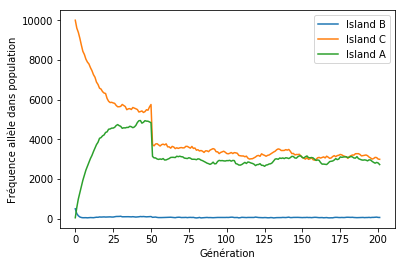

In [197]:
Z = {'A' : 500,
     'B' : 10000,
     'C' : 50} # Initial population
p = {0 : 0.3,
     1 : 0.5,
     2 : 0.1,
     3 : 0.1}
p_galton = {'A' : p,
            'B' : p,
            'C' : p}
p_genetics = {'A' : 0.0,
              'B' : 0.65,
              'C' : 0.85} # Initial proportion of the population that can survive the disease. 
m = {('A','B') : 0.22, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.00,
     ('A','C') : 0.25,
     ('C','A') : 0.01,
     ('B','C') : 0.04,
     ('C','B') : 0.04}
n = 200
n_epi = 50


M = galton_island_with_disease(Z,p_galton,p_genetics,m,n,n_epi)

def plot_genetics2(M,p):
    plt.figure()
    plt.plot(M)
    plt.legend(["Island "+i for i in p])
    plt.xlabel("Génération")
    plt.ylabel("Fréquence allèle dans population")
    plt.show()
    return
plot_genetics2(M,p_genetics)

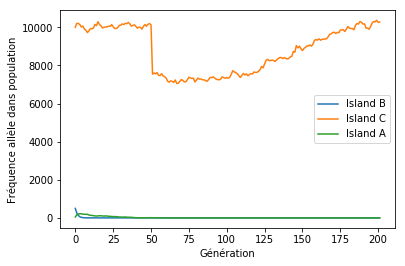

In [217]:
Z = {'A' : 500,
     'B' : 10000,
     'C' : 50} # Initial population
p = {0 : 0.3,
     1 : 0.5,
     2 : 0.1,
     3 : 0.1}
p_galton = {'A' : p,
            'B' : p,
            'C' : p}
p_genetics = {'A' : 0.0,
              'B' : 0.75,
              'C' : 0.25} # Initial proportion of the population that can survive the disease. 
m = {('A','B') : 0.22, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.00,
     ('A','C') : 0.25,
     ('C','A') : 0.01,
     ('B','C') : 0.00,
     ('C','B') : 0.04}
n = 200
n_epi = 50


M = galton_island_with_disease(Z,p_galton,p_genetics,m,n,n_epi)

def plot_genetics2(M,p):
    plt.figure()
    plt.plot(M)
    plt.legend(["Island "+i for i in p])
    plt.xlabel("Génération")
    plt.ylabel("Fréquence allèle dans population")
    plt.show()
    return
plot_genetics2(M,p_genetics)